In [16]:
from cavity_beam_profiler import *
from tools import plot_2D_contour
import matplotlib.pyplot as plt

## Initialize the cavity_profiler class

In [23]:
CF = cavity_profiler('../input/input.yaml')

In [24]:
# screens from records
CF.screens

{'x11': 16.000028294,
 'x10': 16.144218294,
 'x21': 16.650028294000002,
 'x23': 18.534196294,
 'x24': 34.677886294000004,
 'x31': 48.750465293999994,
 'x41': 49.400654882,
 'x42': 49.556554469999995}

## 
One roundtrip from the undulator center

In [25]:
CF.recirculate()
# beam at screens
CF.record

{'x11': <wavefront.GaussianWavefront at 0x243730c4dc0>,
 'x10': <wavefront.GaussianWavefront at 0x243735bd520>,
 'x21': <wavefront.GaussianWavefront at 0x2437360f040>,
 'x23': <wavefront.GaussianWavefront at 0x24372f772b0>,
 'x24': <wavefront.GaussianWavefront at 0x243739e4d60>,
 'x31': <wavefront.GaussianWavefront at 0x2437320e4c0>,
 'x41': <wavefront.GaussianWavefront at 0x243739ef040>,
 'x42': <wavefront.GaussianWavefront at 0x24373964fa0>}

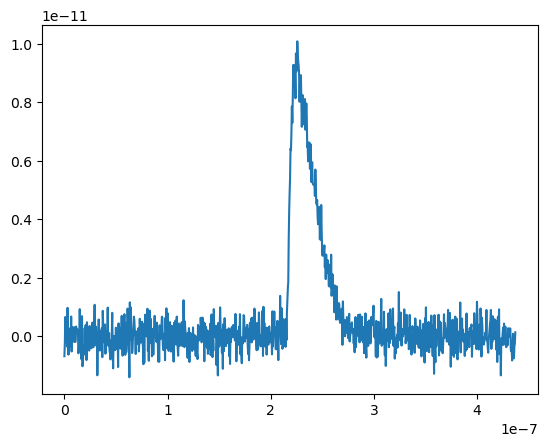

In [26]:
t, sig = CF.get_diodeE_signal()
plt.plot(t, sig)

## Get beam profile at certain screen

Profile at screen x24


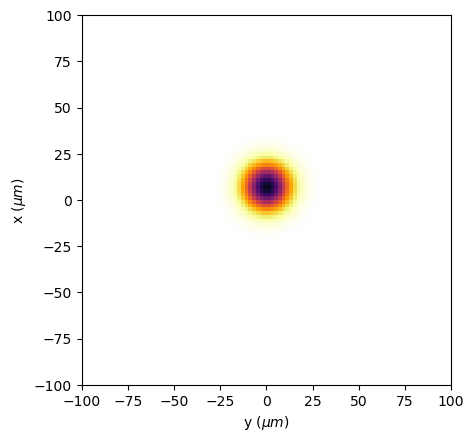

Profile at screen x42


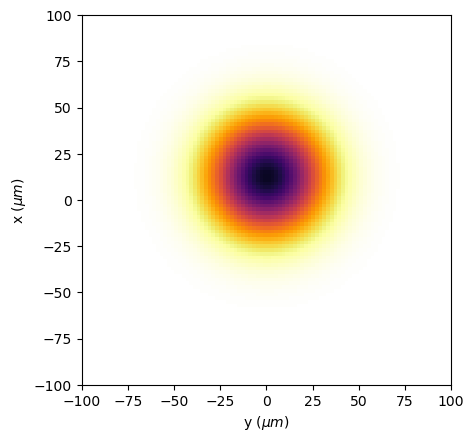

In [27]:
x, y, p = CF.get_profile('x24')
print('Profile at screen x24')
plot_2D_contour(x, y, np.abs(p)**2)

x, y, p = CF.get_profile('x42')
print('Profile at screen x42')
plot_2D_contour(x, y, np.abs(p)**2)

##  Multiple roundtrips 

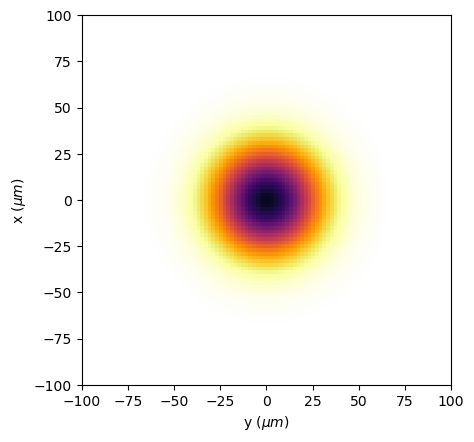

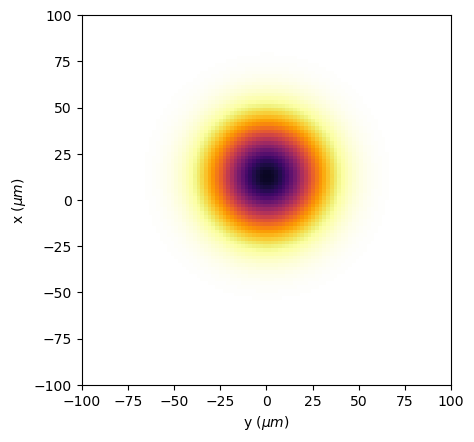

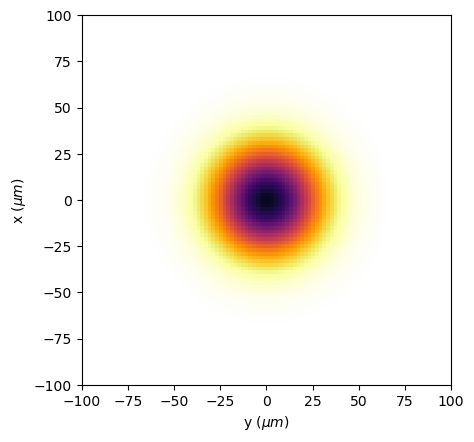

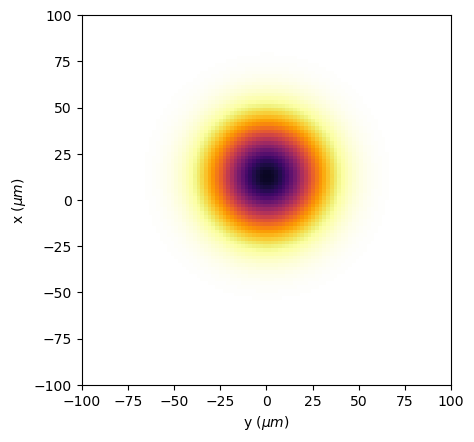

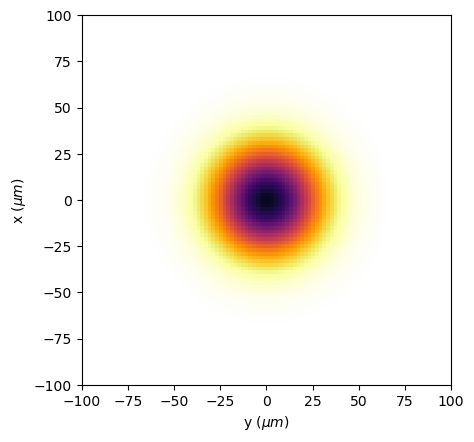

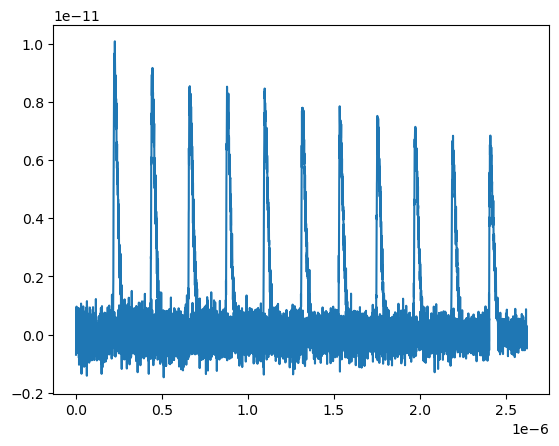

In [28]:
for _ in range(5):
    CF.recirculate()
    x = CF.beam.x
    y = CF.beam.y
    p = CF.beam.get_field()
    plot_2D_contour(x, y, np.abs(p)**2)

for _ in range(5):
    CF.recirculate()

t, sig = CF.get_diodeE_signal()
plt.plot(t, sig)

Profile at screen x24


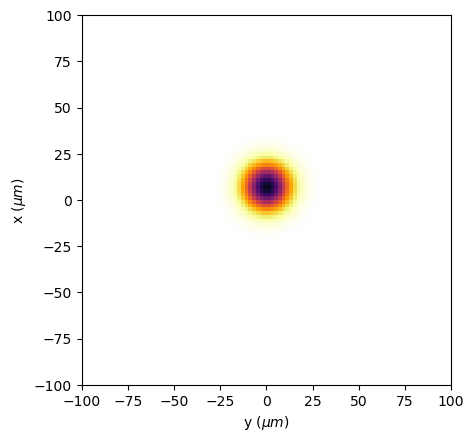

In [29]:
x, y, p = CF.get_profile('x24')
print('Profile at screen x24')
plot_2D_contour(x, y, np.abs(p)**2)

## Include mirror misalignment error

In [30]:
CF = cavity_profiler('../input/input.yaml')
CF.recirculate(dtheta1_x= 800e-9, dtheta2_y = 500e-9)

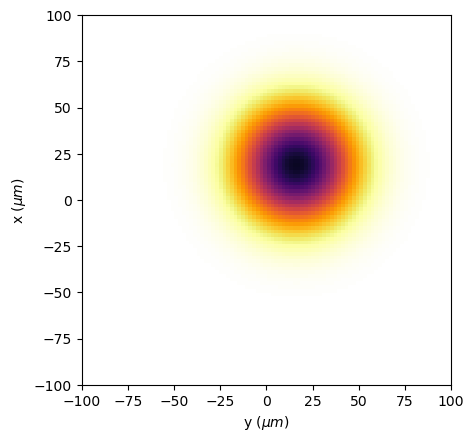

In [9]:
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, np.abs(p)**2)

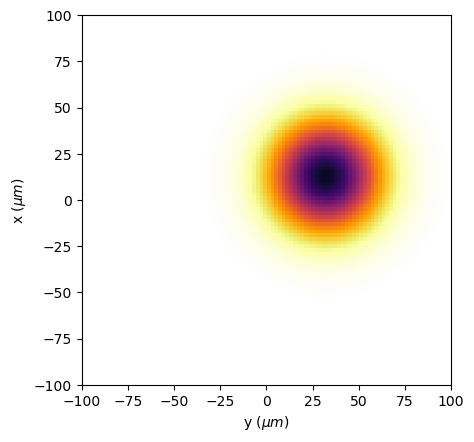

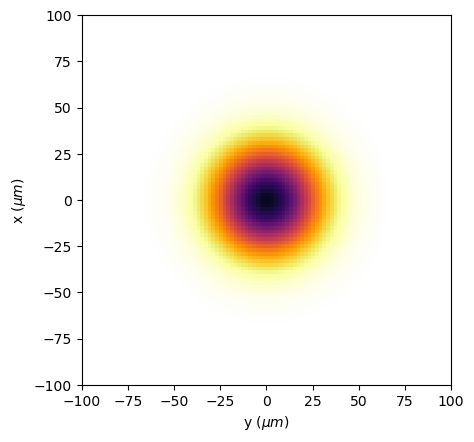

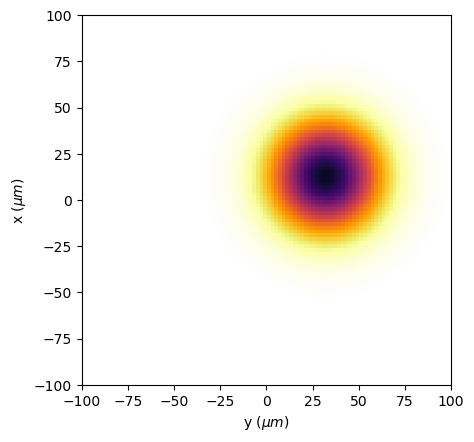

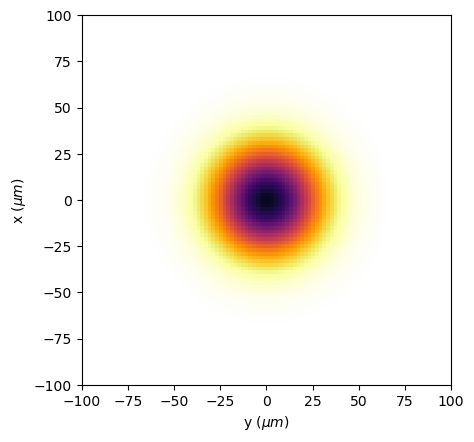

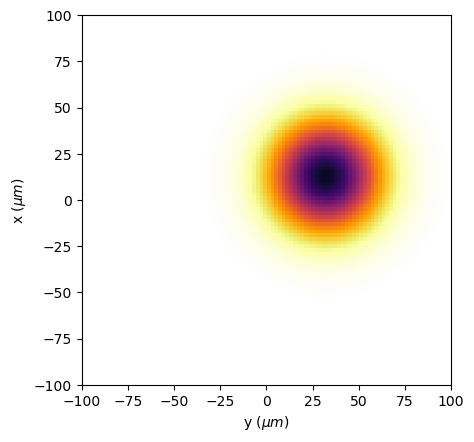

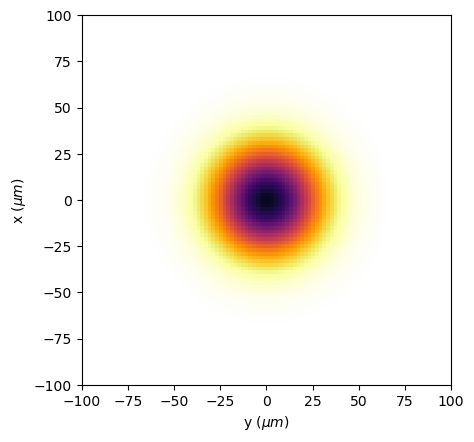

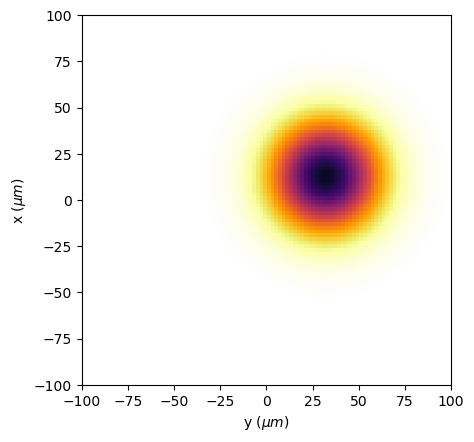

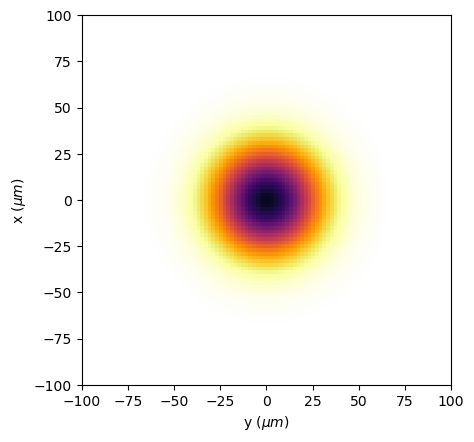

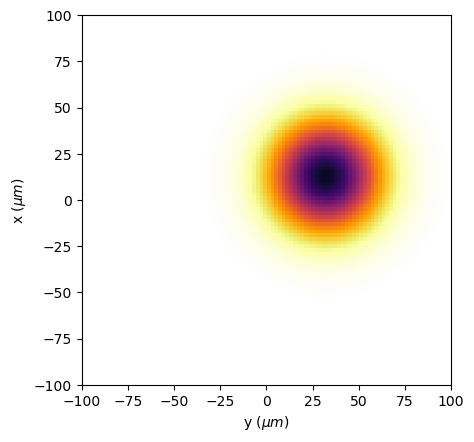

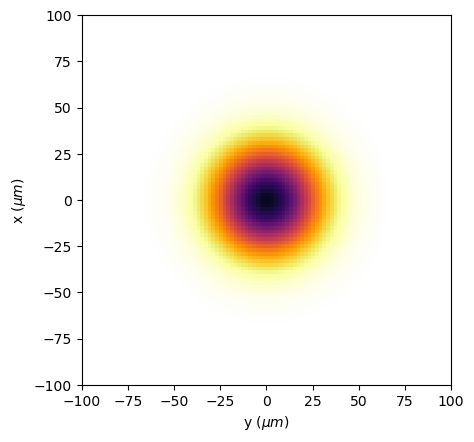

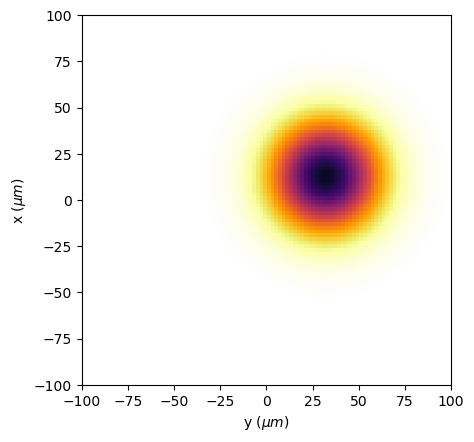

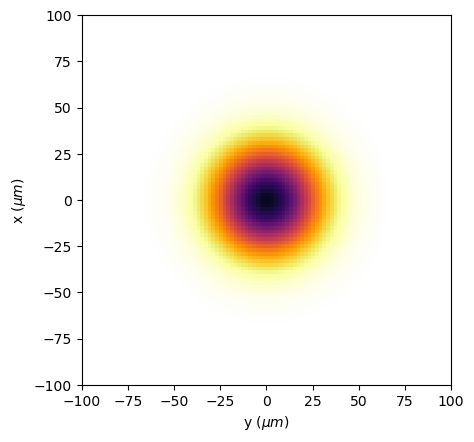

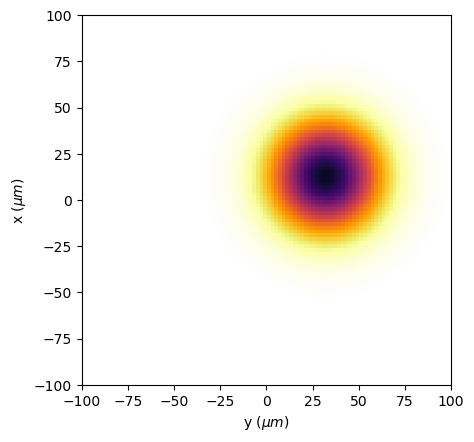

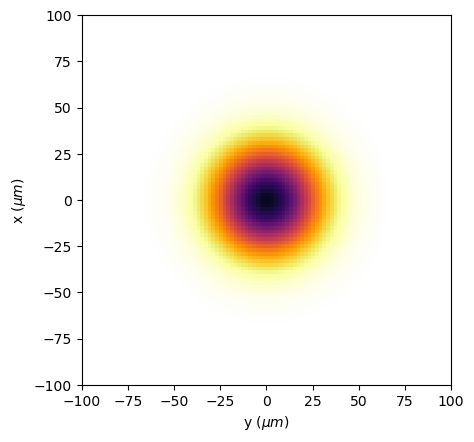

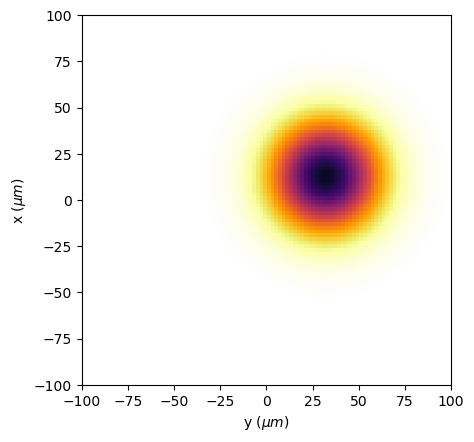

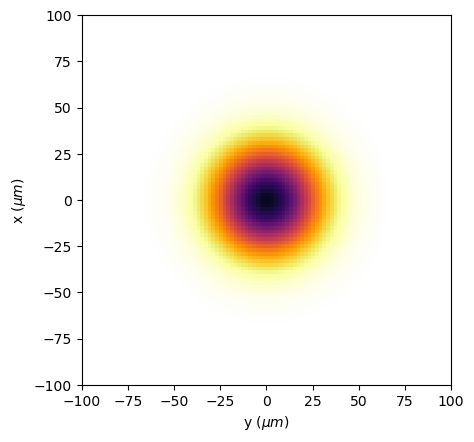

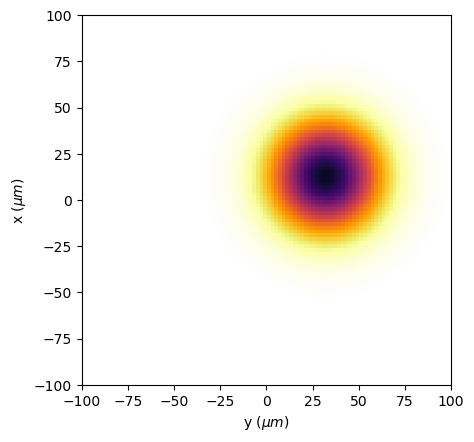

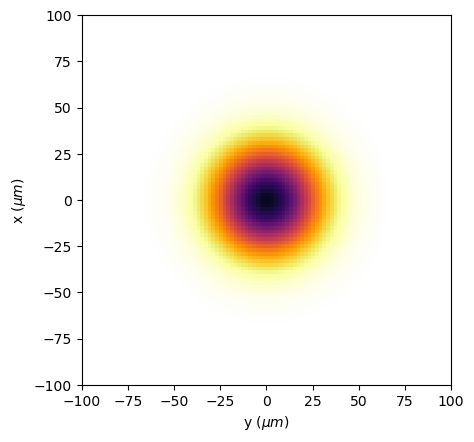

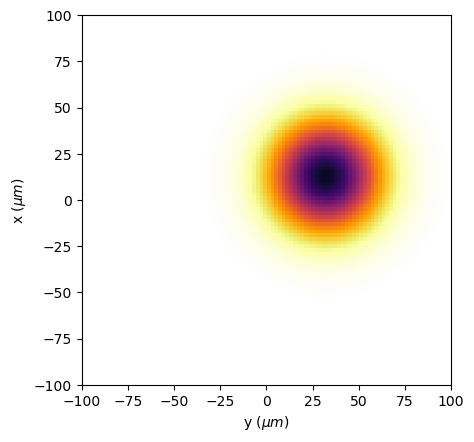

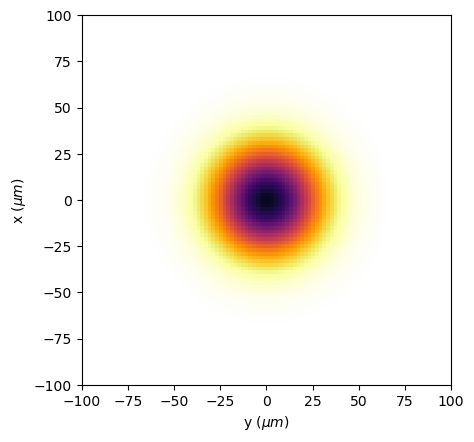

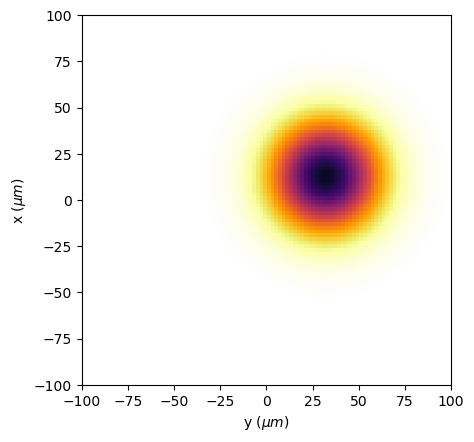

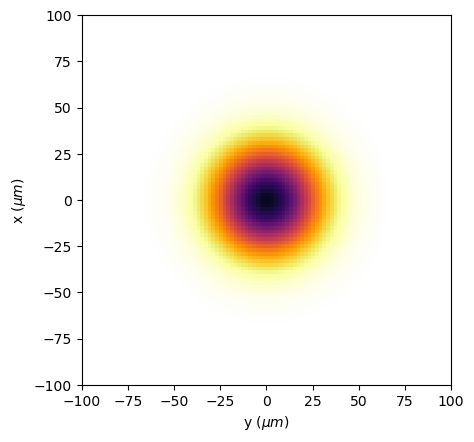

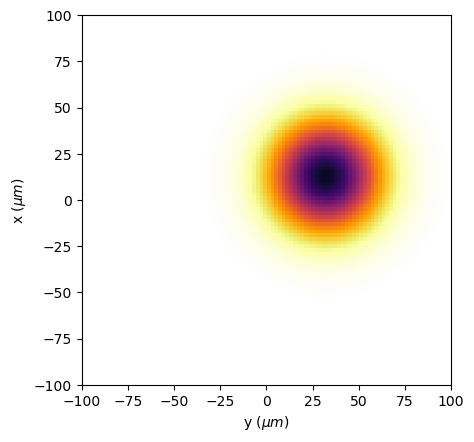

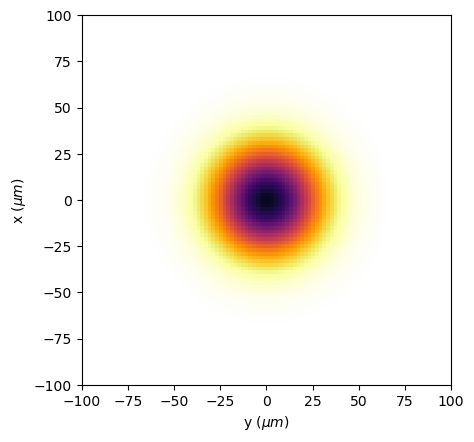

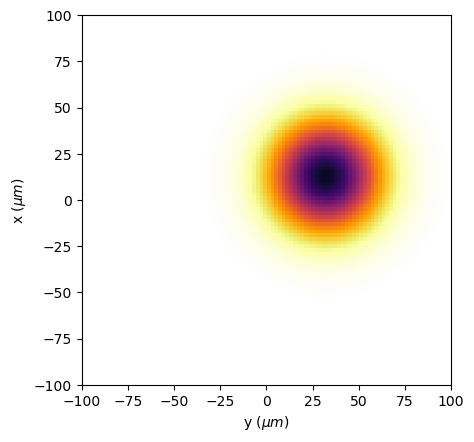

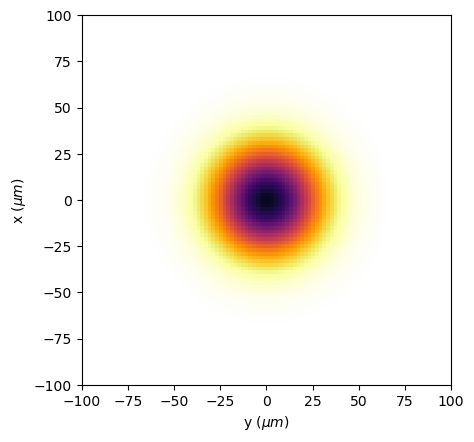

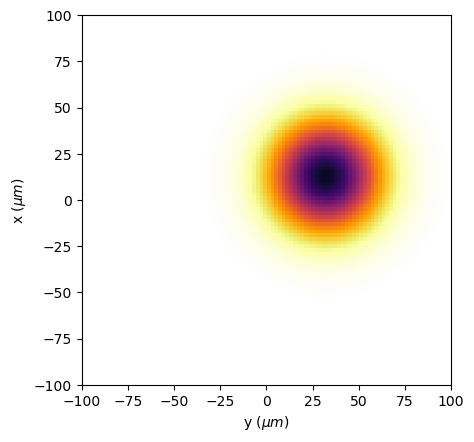

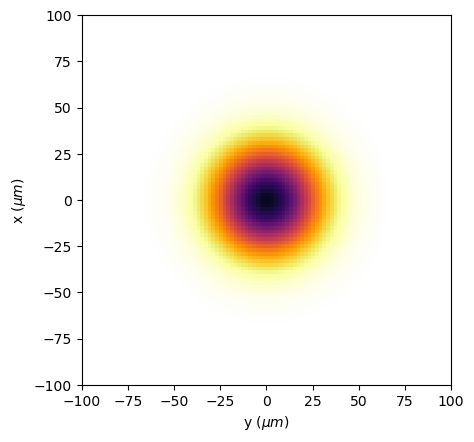

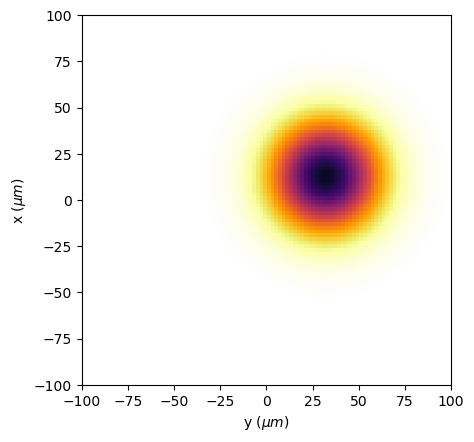

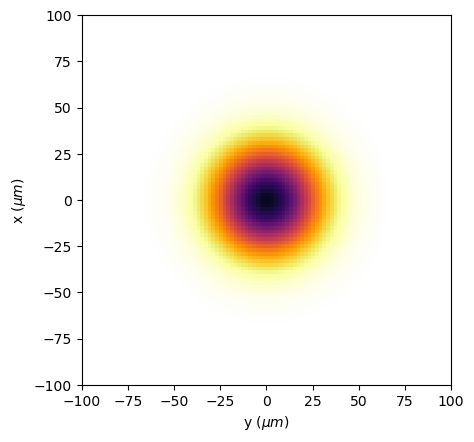

In [10]:
CF = cavity_profiler('../input/input.yaml')
for _ in range(30):
    CF.recirculate(dtheta1_y= 2000e-9)
    x = CF.beam.x
    y = CF.beam.y
    p = CF.beam.get_field()
    plot_2D_contour(x, y, np.abs(p)**2)

## Lens displacement error

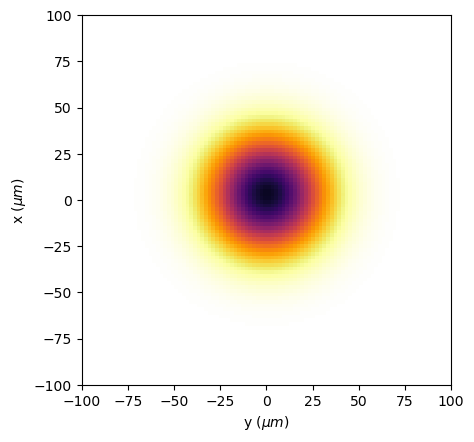

In [15]:
CF = cavity_profiler('../input/input.yaml')
CF.recirculate(dx_CRL1 = 5e-6)
x, y, p = CF.get_profile('x41')
plot_2D_contour(x, y, np.abs(p)**2)